André Bamberg Pan, RA:2079844

In [315]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

Selecionando as colunas PetalLenght e PetalWidth

In [316]:
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

Dividindo os dados:

In [ ]:
# Mantendo os índices originais ao dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Normalização dos dados:

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Centroide mais próximo

In [314]:
class NearestCentroidClassifier:

    def fit(self, X, y):
        self.classes = np.unique(y)
        #centroide para cada classe
        self.centroids = {cls: np.mean(X[y == cls], axis=0) for cls in self.classes}

    def euclidean_distance(self, a, b):
        return np.sqrt(np.sum((a - b) ** 2))

    def predict(self, X_test):
        predictions = []
        for x_test in X_test:
            #distacnias para cada centroide
            distances = [(self.euclidean_distance(x_test, self.centroids[cls]), cls) for cls in self.classes]
            #ordena e seleciona a classe
            distances.sort(key=lambda x: x[0])
            predictions.append(distances[0][1])
        return predictions

Fit e predict nos dados normalizados

In [ ]:
clf = NearestCentroidClassifier()
clf.fit(X_train_scaled, y_train)

In [ ]:
y_train_pred = clf.predict(X_train_scaled)

In [ ]:
y_test_pred = clf.predict(X_test_scaled)

Teste de acurácia:

In [ ]:
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Acuracia nos dados de treino:", accuracy_train)
print("Acuracia nos dados de teste:", accuracy_test)

Acuracia nos dados de treino: 0.9416666666666667
Acuracia nos dados de teste: 1.0


Centroide das classes:

In [ ]:
print("Centroide das classes: ")
for cls, centroid in clf.centroids.items():
    print(f"Classe {cls}: ({centroid[0]:.2f}, {centroid[1]:.2f})")

Centroide das classes: 
Classe 0: (-1.30, -1.25)
Classe 1: (0.30, 0.19)
Classe 2: (1.03, 1.09)


Grafico dos dados normalizados e as centroides

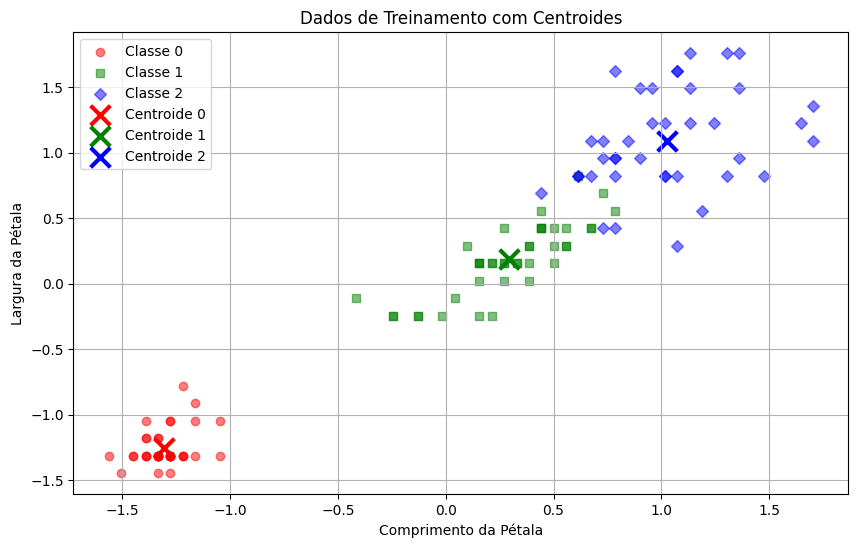

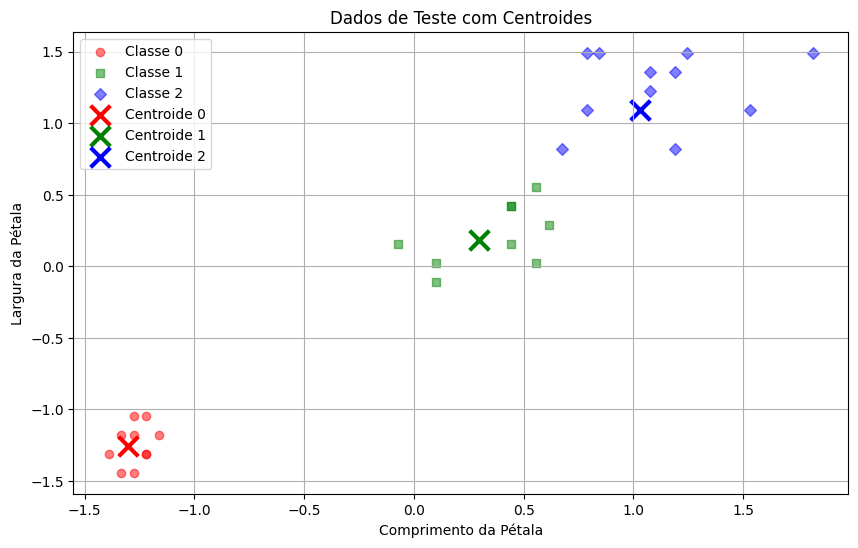

In [ ]:
def plot_data(X, y, centroids, title):
    plt.figure(figsize=(10, 6))
    colors = ['r', 'g', 'b']
    markers = ['o', 's', 'D']
    for cls in np.unique(y):
        plt.scatter(X[y == cls, 0], X[y == cls, 1],
                    color=colors[cls],
                    marker=markers[cls],
                    label=f'Classe {cls}', alpha=0.5)

    # Plotar os centroides
    for cls, centroid in centroids.items():
        plt.scatter(centroid[0], centroid[1],
                    color=colors[cls],
                    marker='x',
                    s=200,
                    linewidths=3,
                    label=f'Centroide {cls}')

    plt.xlabel('Comprimento da Pétala (normalizado)')
    plt.ylabel('Largura da Pétala (normalizado)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotar dados de treinamento
plot_data(X_train_scaled, y_train, clf.centroids, 'Dados de Treinamento com Centroides')

# Plotar dados de teste
plot_data(X_test_scaled, y_test, clf.centroids, 'Dados de Teste com Centroides')